Total Game Score Model - GBM

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import RFECV

pd.options.display.max_rows = 10
pd.options.display.max_columns = 999


Load Data

In [2]:
data = pd.read_csv("/total-points-score-model/data/modelling-data/modelling_data_total_team_score.csv")

In [3]:
data.tail(2)

,Unnamed: 0,Match_ID,AFL_API_Match_ID,Home_Team,Away_Team,Date,Venue,Match_Status,Q4_Score,Round_ID,Year,Q1_Score,Q2_Score,Q3_Score,Margin,Total_Game_Score,Home_Win,City,Attendance,Umpires,Home_Coach_ID,Away_Coach_ID,Q5_Score,Temperature,Weather_Type,Home_Score,Away_Score,Home_Goals,Home_Behinds,Home_Total_Score,Away_Goals,Away_Behinds,Away_Total_Score,random5,training_set,Home_Total_Game_Score_avg2,Home_For_Goals_avg2,Home_For_Behinds_avg2,Home_For_Scores_avg2,Home_For_Total_Score_avg2,Home_Against_Goals_avg2,Home_Against_Behinds_avg2,Home_Against_Scores_avg2,Home_Against_Total_Score_avg2,Home_Total_Game_Score_avg10,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Scores_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Behinds_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Goals_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_For_Total_Score_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10
3004,3005,2022F3_Sydney_Collingwood,CD_M20220142602,Sydney,Collingwood,2022-09-17 16:45:00,S.C.G.,CONCLUDED,14.11.95 - 14.10.94,2022F3,2022,6.3.39 - 3.0.18,11.7.73 - 7.1.43,13.10.88 - 10.5.65,1,189,1.0,Sydney,45608.0,NaN,John_Longmire,Craig_McRae,NaN,23.0,MOSTLY_SUNNY,14.11.95,14.10.94,14,11,95,14,10,94,5,False,174.5,14.0,9.0,23.0,93.0,12.0,9.5,21.5,81.5,172.1,14.4,13.1,27.5,99.5,10.5,9.6,20.1,72.6,163.5,12.5,11.5,24.0,86.5,11.5,8.0,19.5,77.0,161.0,12.0,9.3,21.3,81.3,11.6,10.1,21.7,79.7
3005,3006,2022F4_Geelong_Sydney,CD_M20220142701,Geelong,Sydney,2022-09-24 14:30:00,M.C.G.,CONCLUDED,20.13.133 - 8.4.52,2022F4,2022,6.5.41 - 1.0.6,9.8.62 - 4.2.26,15.11.101 - 4.3.27,81,185,1.0,Melbourne,100024.0,"Simon Meredith (439), Matt Stevic (449), Brend...",Chris_Scott,John_Longmire,NaN,15.0,RAIN,20.13.133,8.4.52,20,13,133,8,4,52,4,True,177.0,19.0,12.5,31.5,126.5,7.5,5.5,13.0,50.5,168.8,15.7,12.5,28.2,106.7,9.1,7.5,16.6,62.1,187.0,11.0,7.5,18.5,73.5,17.0,11.5,28.5,113.5,172.5,14.0,12.1,26.1,96.1,11.0,10.4,21.4,76.4


Clean Data

In [4]:
modelling_data = data[data['Date'] < "2019-01-01"]
oot_data = data[data['Date'] >= "2019-01-01"]

In [5]:
modelling_data.shape, oot_data.shape

((2385, 71), (621, 71))

In [6]:
training_data = modelling_data[modelling_data['training_set'] == True]
test_data = modelling_data[modelling_data['training_set'] == False]

In [7]:
training_data.shape, test_data.shape

((1909, 71), (476, 71))

Train Model

In [8]:
response = "Total_Game_Score"

In [9]:
list(training_data)

['Unnamed: 0',
 'Match_ID',
 'AFL_API_Match_ID',
 'Home_Team',
 'Away_Team',
 'Date',
 'Venue',
 'Match_Status',
 'Q4_Score',
 'Round_ID',
 'Year',
 'Q1_Score',
 'Q2_Score',
 'Q3_Score',
 'Margin',
 'Total_Game_Score',
 'Home_Win',
 'City',
 'Attendance',
 'Umpires',
 'Home_Coach_ID',
 'Away_Coach_ID',
 'Q5_Score',
 'Temperature',
 'Weather_Type',
 'Home_Score',
 'Away_Score',
 'Home_Goals',
 'Home_Behinds',
 'Home_Total_Score',
 'Away_Goals',
 'Away_Behinds',
 'Away_Total_Score',
 'random5',
 'training_set',
 'Home_Total_Game_Score_avg2',
 'Home_For_Goals_avg2',
 'Home_For_Behinds_avg2',
 'Home_For_Scores_avg2',
 'Home_For_Total_Score_avg2',
 'Home_Against_Goals_avg2',
 'Home_Against_Behinds_avg2',
 'Home_Against_Scores_avg2',
 'Home_Against_Total_Score_avg2',
 'Home_Total_Game_Score_avg10',
 'Home_For_Goals_avg10',
 'Home_For_Behinds_avg10',
 'Home_For_Scores_avg10',
 'Home_For_Total_Score_avg10',
 'Home_Against_Goals_avg10',
 'Home_Against_Behinds_avg10',
 'Home_Against_Scores_avg10

In [10]:
modelling_features = [
    'Venue',
    'Year',
    'Temperature',
    'Weather_Type',
    'Home_Team',
    'Away_Team',
    'Home_Total_Game_Score_avg2',
    'Home_For_Goals_avg2',
    'Home_For_Behinds_avg2',
    'Home_For_Scores_avg2',
    'Home_For_Total_Score_avg2',
    'Home_Against_Goals_avg2',
    'Home_Against_Behinds_avg2',
    'Home_Against_Scores_avg2',
    'Home_Against_Total_Score_avg2',
    'Home_Total_Game_Score_avg10',
    'Home_For_Goals_avg10',
    'Home_For_Behinds_avg10',
    'Home_For_Scores_avg10',
    'Home_For_Total_Score_avg10',
    'Home_Against_Goals_avg10',
    'Home_Against_Behinds_avg10',
    'Home_Against_Scores_avg10',
    'Home_Against_Total_Score_avg10',
    'Away_Total_Game_Score_avg2',
    'Away_For_Goals_avg2',
    'Away_For_Behinds_avg2',
    'Away_For_Scores_avg2',
    'Away_For_Total_Score_avg2',
    'Away_Against_Goals_avg2',
    'Away_Against_Behinds_avg2',
    'Away_Against_Scores_avg2',
    'Away_Against_Total_Score_avg2',
    'Away_Total_Game_Score_avg10',
    'Away_For_Goals_avg10',
    'Away_For_Behinds_avg10',
    'Away_For_Scores_avg10',
    'Away_For_Total_Score_avg10',
    'Away_Against_Goals_avg10',
    'Away_Against_Behinds_avg10',
    'Away_Against_Scores_avg10',
    'Away_Against_Total_Score_avg10']

In [11]:
X, y = training_data[modelling_features], training_data[response]
X_test, y_test = test_data[modelling_features], test_data[response]
X_oot, y_oot = oot_data[modelling_features], oot_data[response]

In [12]:
X_dummies = pd.get_dummies(X)
X_test_dummies = pd.get_dummies(X_test)
X_oot_dummies = pd.get_dummies(X_oot)

for col in list(X_dummies):
    if col not in list(X_test_dummies):
        X_test_dummies[col] = 0
        
for col in list(X_dummies):
    if col not in list(X_oot_dummies):
        X_oot_dummies[col] = 0

In [14]:
X_dummies.shape, X_test_dummies.shape, X_oot_dummies.shape

((1909, 104), (476, 104), (621, 106))

Feature Selection

In [15]:
xgb_model = xgb.XGBRegressor()

In [16]:
selector = RFECV(xgb_model, step=1, cv=5, min_features_to_select = 20)

In [17]:
selector = selector.fit(X_dummies, y)

In [18]:
selector.n_features_

36

In [19]:
selected_features = list(selector.get_feature_names_out())
selected_features

['Home_Total_Game_Score_avg2',
 'Home_Against_Total_Score_avg2',
 'Home_For_Goals_avg10',
 'Home_For_Behinds_avg10',
 'Home_For_Total_Score_avg10',
 'Home_Against_Goals_avg10',
 'Home_Against_Behinds_avg10',
 'Home_Against_Scores_avg10',
 'Home_Against_Total_Score_avg10',
 'Away_Total_Game_Score_avg2',
 'Away_For_Goals_avg2',
 'Away_For_Scores_avg2',
 'Away_For_Total_Score_avg2',
 'Away_Against_Behinds_avg2',
 'Away_Against_Scores_avg2',
 'Away_Against_Total_Score_avg2',
 'Away_Total_Game_Score_avg10',
 'Away_For_Goals_avg10',
 'Away_For_Behinds_avg10',
 'Away_For_Scores_avg10',
 'Away_Against_Goals_avg10',
 'Away_Against_Behinds_avg10',
 'Away_Against_Scores_avg10',
 'Away_Against_Total_Score_avg10',
 'Venue_Docklands',
 'Venue_Marrara Oval',
 'Venue_Perth Stadium',
 'Weather_Type_CLEAR_NIGHT',
 'Weather_Type_MOSTLY_CLEAR',
 'Weather_Type_RAIN',
 'Home_Team_Essendon',
 'Away_Team_Adelaide',
 'Away_Team_Collingwood',
 'Away_Team_Sydney',
 'Away_Team_West Coast',
 'Away_Team_Western Bul

In [20]:
X_train_selected = X_dummies[selected_features]
X_test_selected = X_test_dummies[selected_features]
X_oot_selected = X_oot_dummies[selected_features]

In [21]:
dtrain = xgb.DMatrix(X_train_selected, label=y)
dtest = xgb.DMatrix(X_test_selected, label=y_test)
doot = xgb.DMatrix(X_oot_selected, label=y_oot)

In [22]:
xgb_params = {'max_depth': 5,
              'min_child_weight':10,
              'eta': 1
              }
xgb_params['objective'] = 'reg:squarederror'
xgb_params['eval_metric'] = 'rmse'
evallist = [(dtrain, 'train'), (dtest, 'test')]

In [23]:
num_round = 100
bst = xgb.train(xgb_params, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	train-rmse:19.42586	test-rmse:19.94662
[1]	train-rmse:17.25741	test-rmse:18.88048
[2]	train-rmse:16.60819	test-rmse:19.27586
[3]	train-rmse:15.95754	test-rmse:19.95619
[4]	train-rmse:15.49185	test-rmse:20.48101
[5]	train-rmse:14.89940	test-rmse:20.53812
[6]	train-rmse:14.68880	test-rmse:20.67772
[7]	train-rmse:14.42718	test-rmse:20.99588
[8]	train-rmse:14.16602	test-rmse:21.21492
[9]	train-rmse:13.46645	test-rmse:21.69231
[10]	train-rmse:13.04465	test-rmse:22.02982
[11]	train-rmse:12.61521	test-rmse:22.26252


/Users/ciaran/opt/anaconda3/envs/afl-total-model-env/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

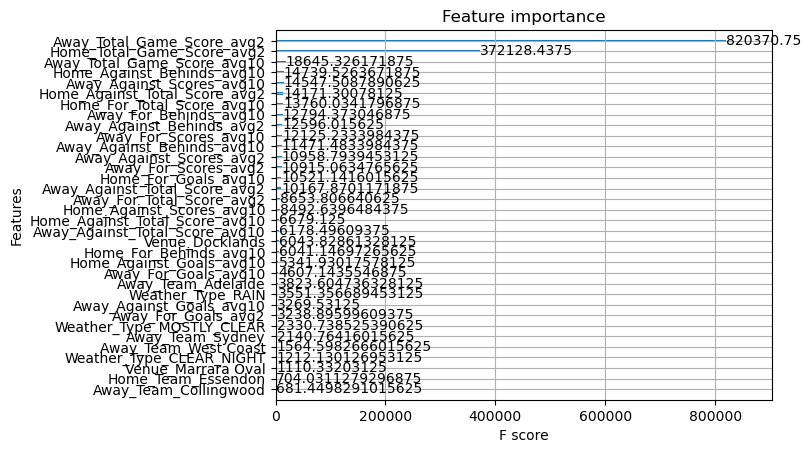

In [24]:
xgb.plot_importance(bst, importance_type = "total_gain")

Evaluate Model

In [25]:
test_preds = bst.predict(dtest)
oot_preds = bst.predict(doot)

In [26]:
def MAE(data, model, actuals):

    preds = model.predict(data)
    absolute_error = abs(preds - actuals)
    mae = np.mean(absolute_error)

    return mae

In [27]:
def RMSE(data, model, actuals):

    preds = model.predict(data)
    squared_error = (preds - actuals)**2
    mean_squared_error = np.mean(squared_error)
    rmse = (mean_squared_error)**0.5

    return rmse

In [28]:
def get_error_metrics(data, model, actuals):

    mae = MAE(data, model, actuals)
    rmse = RMSE(data, model, actuals)

    print("MAE: {}".format(mae))
    print("RMSE: {}".format(rmse))

    return mae, rmse

In [29]:
get_error_metrics(dtrain, bst, y)

MAE: 9.845226945272598
RMSE: 12.615208177476696


(9.845226945272598, 12.615208177476696)

In [30]:
get_error_metrics(dtest, bst, y_test)

MAE: 17.70880123747497
RMSE: 22.26251980433521


(17.70880123747497, 22.26251980433521)

In [31]:
get_error_metrics(doot, bst, y_oot)

MAE: 16.612340549339994
RMSE: 21.183241833748408


(16.612340549339994, 21.183241833748408)

Save model predictions

In [32]:
data_dummies = pd.get_dummies(data)
data_features = data_dummies[bst.feature_names]
data_response = data[response]

In [33]:
dmatrix = xgb.DMatrix(data_features, label=data_response)

In [34]:
data['xgb_preds'] = bst.predict(dmatrix)

In [35]:
data['xgb_preds'].mean(), data[response].mean()

(175.9703, 176.74883566200933)

In [37]:
data['std_dev'] = np.std(y)

In [39]:
data[['Match_ID', 'Date', 'Total_Game_Score', 'xgb_preds', 'std_dev']].head()

,Match_ID,Date,Total_Game_Score,xgb_preds,std_dev
0,200701_Adelaide_Essendon,2007-04-01 13:10:00,179,169.727432,32.125702
1,200701_BrisbaneLions_Hawthorn,2007-03-31 19:15:00,113,169.727432,32.125702
2,200701_Carlton_Richmond,2007-04-01 17:10:00,213,169.727432,32.125702
3,200701_Fremantle_PortAdelaide,2007-03-31 16:10:00,226,169.727432,32.125702
4,200701_Melbourne_StKilda,2007-03-30 19:40:00,155,169.727432,32.125702


In [40]:
data[['Match_ID', 'Date', 'Total_Game_Score', 'xgb_preds', 'std_dev']].to_csv("/total-points-score-model/data/model-predictions/xgb_model_preds.csv", index=False)